In [9]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [10]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
maze.render()

This is how maze looks like

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ A □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [11]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(perception) and
                cl.action == action and
                cl.wildcard_number == 0
               ]):
            nr_correct += 1
    return nr_correct / len(transitions)

def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity,
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=4,
                    max_population=200,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [6.377150577806138e-40, 4.252646109511498e-40, 7.3409168711337795e-40, 6.802381997769329e-40], 'numerosity': 32, 'knowledge': 0.05217391304347826, 'population': 24}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 5, 'reward': [112.90642371155366, 10.841874413666908, 7.035019921005309, 7.815758453930583], 'numerosity': 132, 'knowledge': 0.2608695652173913, 'population': 100}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': [42.32211927354301, 15.467164386772282, 46.108787098608545, 15.936582771570086], 'numerosity': 142, 'knowledge': 0.2608695652173913, 'population': 100}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 9, 'reward': [192.9096875713292, 13.645324857798885, 16.044810353335638, 11.87287213817752], 'numerosity': 146, 'knowledge': 0.25217391304347825, 'population': 100}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 11, 'reward': [117.84136554425527, 8.759959812550441,

Cond:10#11100 - Act:0 - Num:1 [fit: 0.000, exp: 52.00, pred: 215.516]
Cond:10011100 - Act:1 - Num:1 [fit: 0.008, exp: 19.00, pred: 155.541]
Cond:100##100 - Act:2 - Num:1 [fit: 0.000, exp: 51.00, pred: 235.879]
Cond:#00111#0 - Act:3 - Num:1 [fit: 0.007, exp: 20.00, pred: 134.489]
Cond:00010010 - Act:0 - Num:1 [fit: 0.002, exp: 49.00, pred: 198.062]
Cond:000100#0 - Act:1 - Num:1 [fit: 0.001, exp: 42.00, pred: 160.682]
Cond:00010010 - Act:2 - Num:1 [fit: 0.016, exp: 19.00, pred: 171.990]
Cond:00010010 - Act:3 - Num:1 [fit: 0.004, exp: 26.00, pred: 135.713]
Cond:0#00#000 - Act:0 - Num:3 [fit: 0.000, exp: 229.00, pred: 218.152]
Cond:00001000 - Act:1 - Num:1 [fit: 0.003, exp: 31.00, pred: 94.052]
Cond:00001000 - Act:2 - Num:1 [fit: 0.014, exp: 13.00, pred: 148.450]
Cond:00001000 - Act:3 - Num:1 [fit: 0.014, exp: 13.00, pred: 98.651]
Cond:#1111110 - Act:0 - Num:1 [fit: 0.000, exp: 53.00, pred: 168.987]
Cond:011#111# - Act:1 - Num:1 [fit: 0.017, exp: 11.00, pred: 144.804]
Cond:#1111110 - Act:2

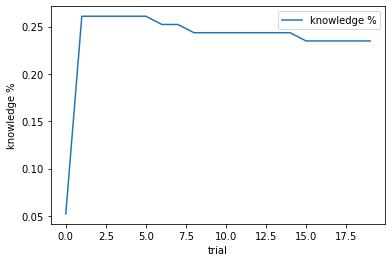

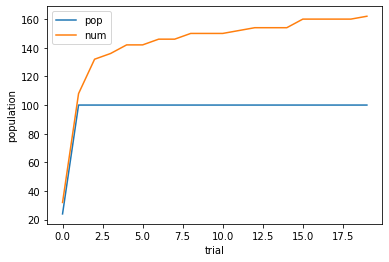

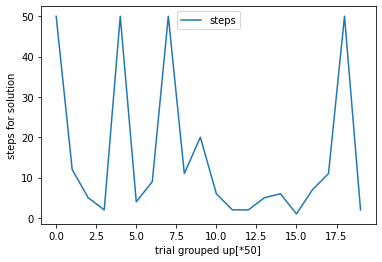

In [12]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []



xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [13]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
